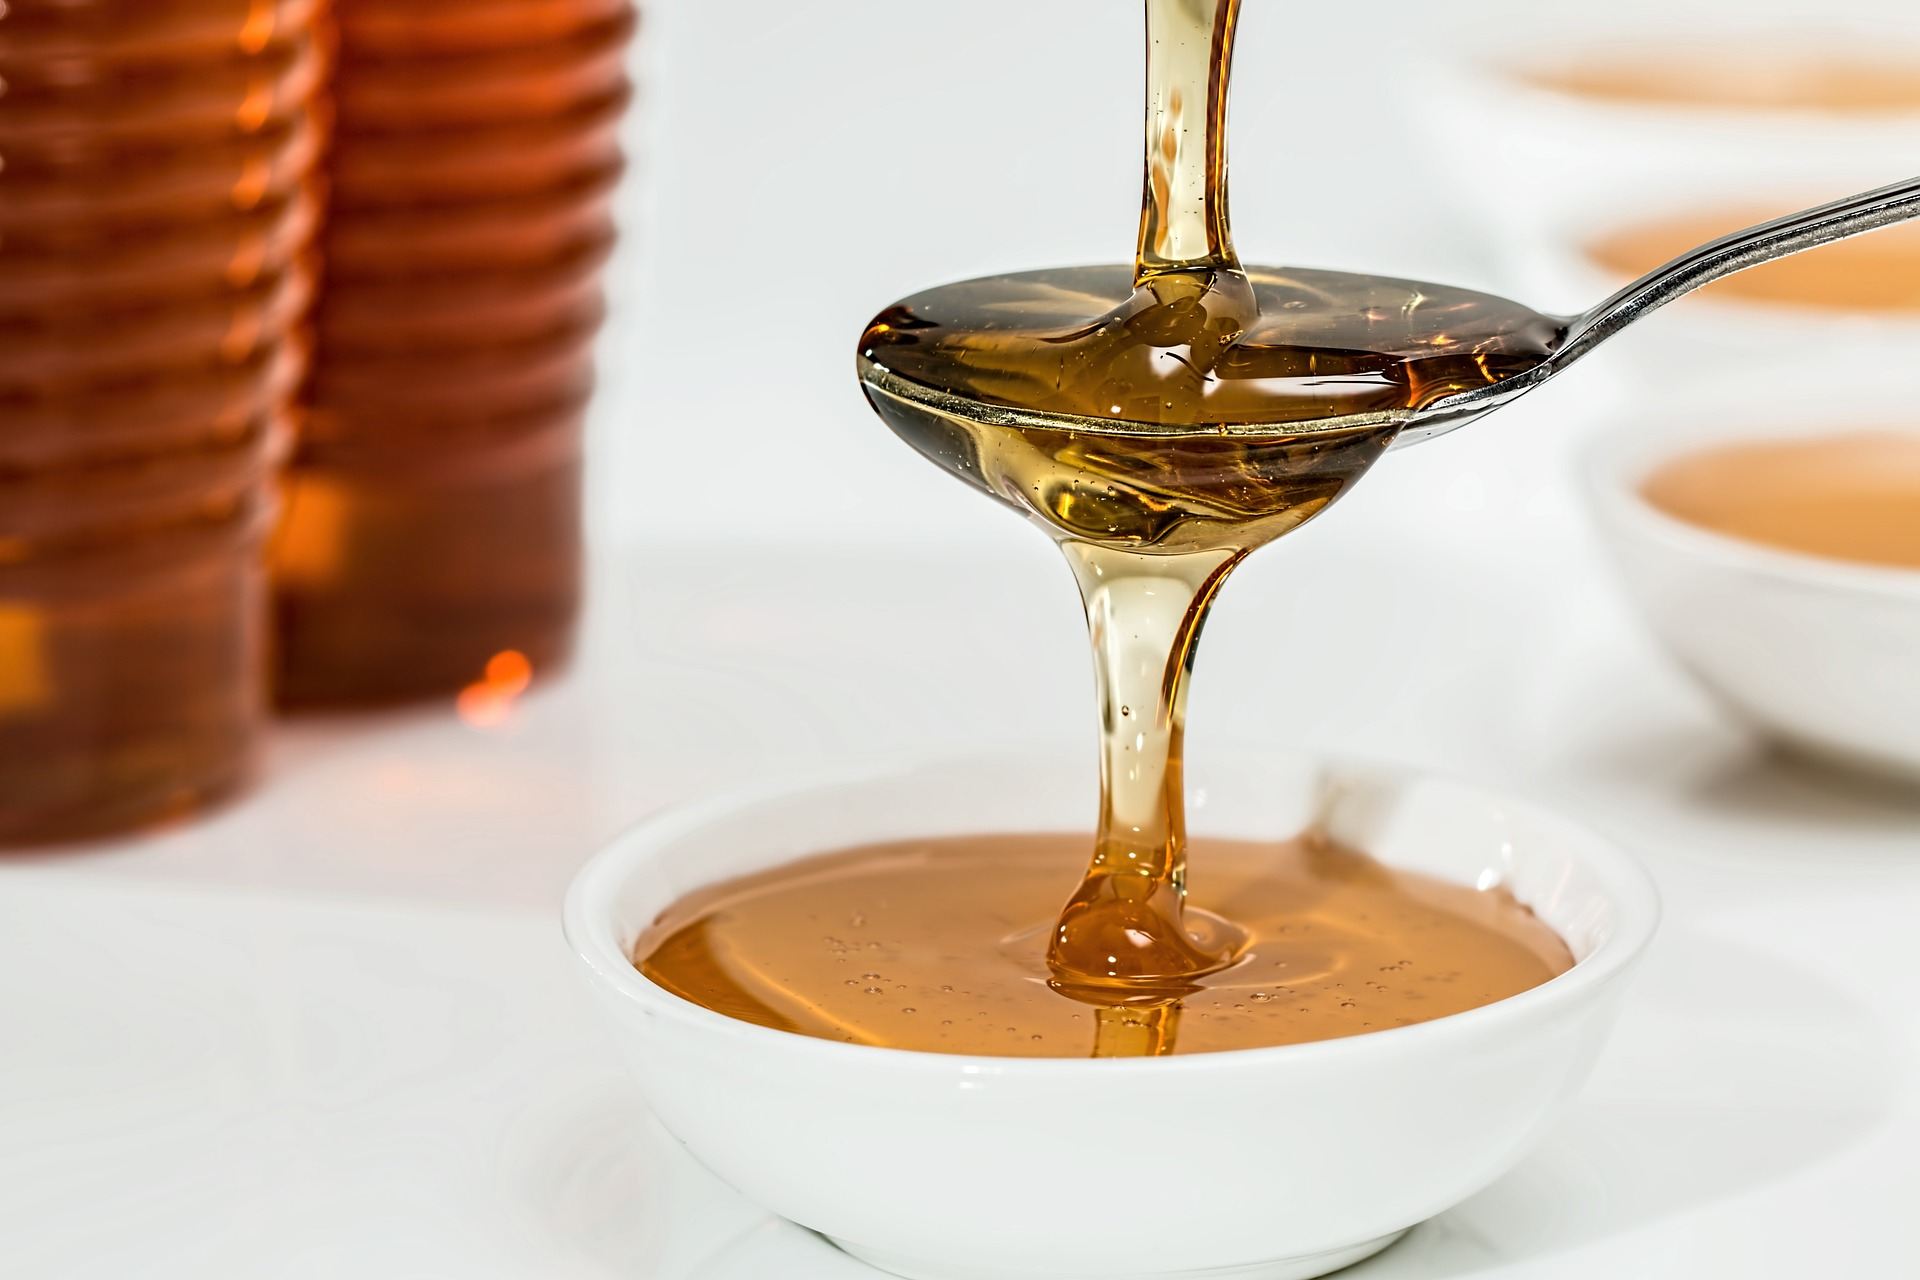
<b><h2><center>Honey Production Case Study</center></h2></b>

# Background
Since 2006, global attention has been drawn to the sharp decline in honeybee populations, which are essential for American agriculture and pollination. This decline, known as Colony Collapse Disorder (CCD), is marked by the mysterious disappearance of worker bees, leading to the collapse of entire hives. Although theories suggest that diseases and pesticides may be contributing to CCD, no definitive cause has been identified. Historically, the U.S. produced more than half of the honey it consumed, but today, the majority of honey (350 million pounds out of 400 million pounds annually) comes from imports. This dataset captures honey production data in the U.S. from 1998 to 2016, offering a window into the changing dynamics of honey supply and demand over time.

# Objective: 
The objective of this analysis is to explore and visualize how honey production in the U.S. evolved from 1998 to 2016. This includes examining trends in production across states, the relationship between total honey production and its market value, and how external factors may have influenced production.

Key questions to address:

* Honey Production Trends: How has the total honey production in the U.S. fluctuated between 1998 and 2016?
* Over time, what have been the major production trends across the states?
* Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production, which in some sense could be tied to demand, changed every year?


# Dataset:

* **State**: Various states in the U.S.
* **year**: Year of production
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: honey yield per colony. The unit is in pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.


## Load the dataset

In [16]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('honeyproduction1998-2016-1.csv')

In [18]:
df.shape

(785, 8)

In [19]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [20]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [21]:
df.describe(include='all')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,NaN,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,NaN,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,NaN,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000


## Does data exhibit skewness?

## Which variables have outliers?

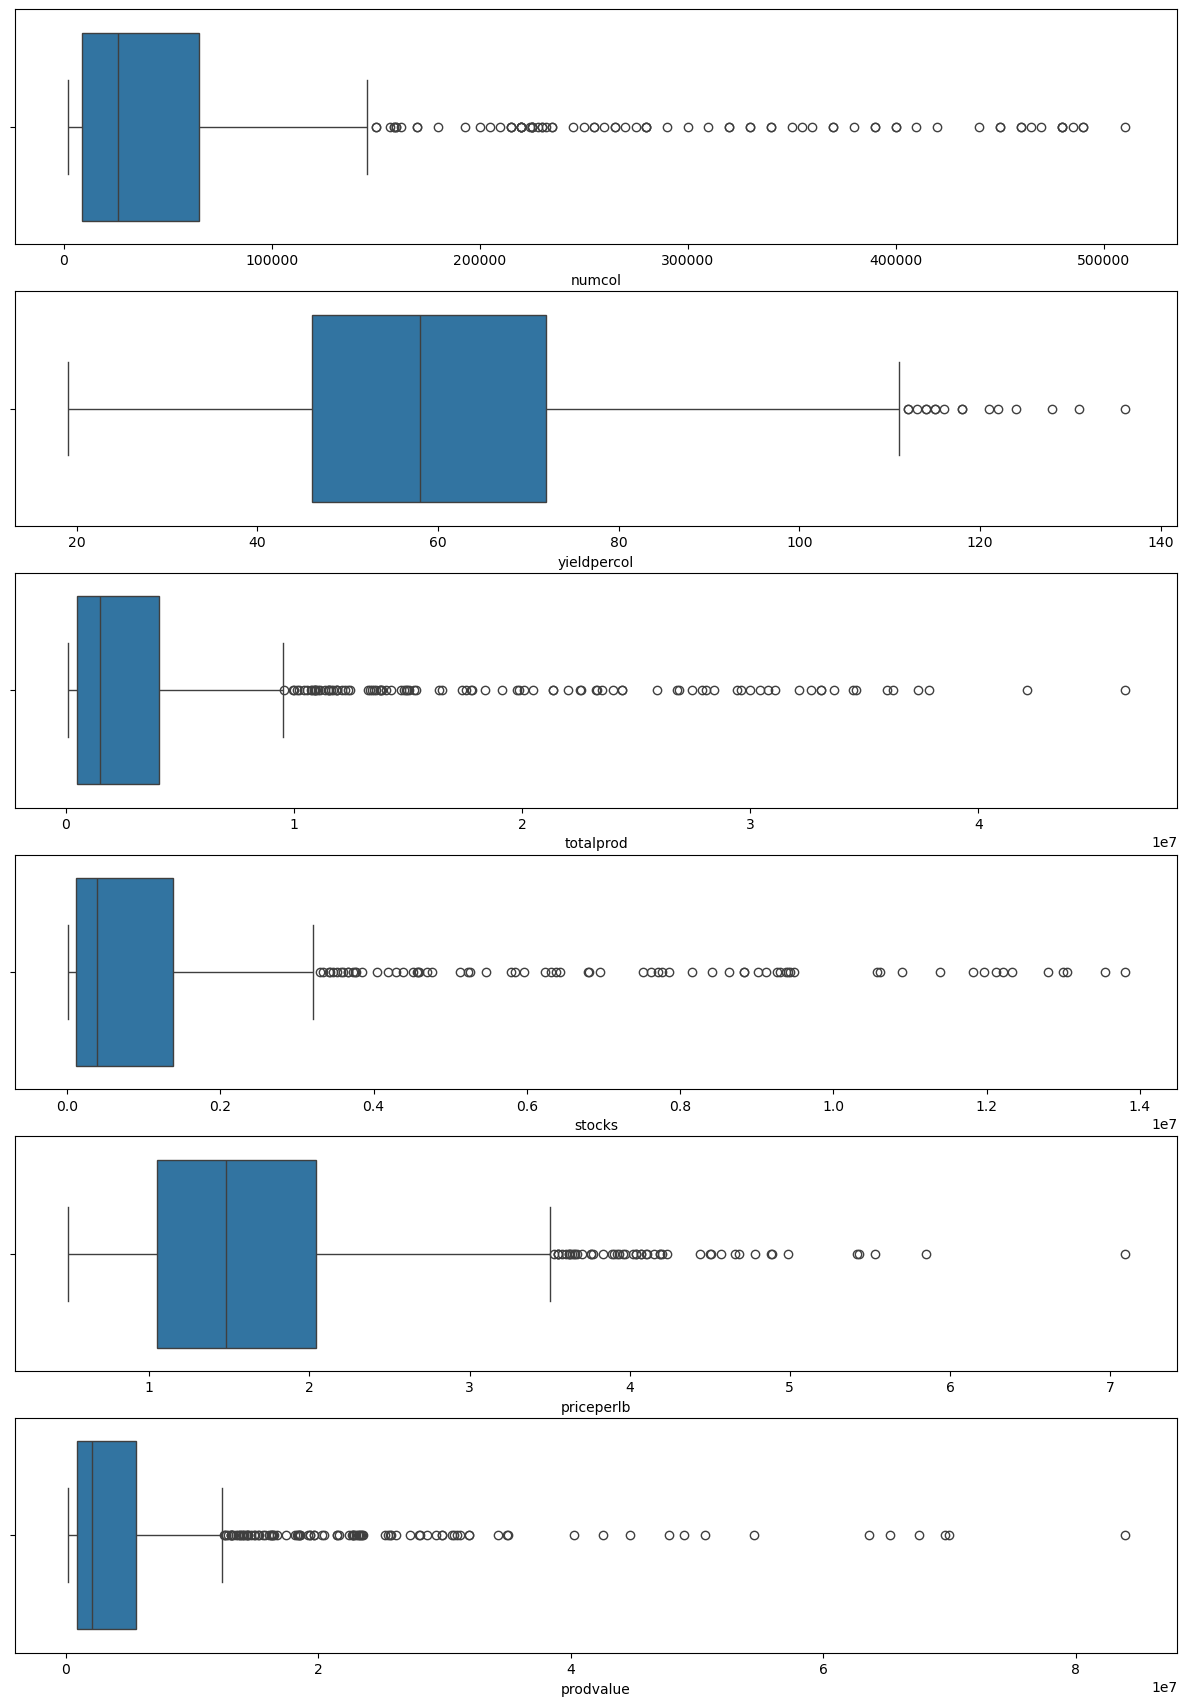

In [76]:
plt.figure(figsize=[15,25])
plt.subplot(7,1,1)
sns.boxplot(data=df,x='numcol')
plt.subplot(7,1,2)
sns.boxplot(data=df,x='yieldpercol')
plt.subplot(7,1,3)
sns.boxplot(data=df,x='totalprod')
plt.subplot(7,1,4)
sns.boxplot(data=df,x='stocks')
plt.subplot(7,1,5)
sns.boxplot(data=df,x='priceperlb')
plt.subplot(7,1,6)
sns.boxplot(data=df,x='prodvalue')
plt.show()

## extract which states have maximum and minimum honey production?

In [26]:
df.sort_values('totalprod',ascending=True).head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
233,Maryland,2000.0,42,84000.0,21000.0,1.93,162000.0,2003
561,Maine,4000.0,30,120000.0,17000.0,1.98,238000.0,2011
639,Kentucky,3000.0,41,123000.0,17000.0,3.25,400000.0,2013
601,Maine,4000.0,34,136000.0,24000.0,2.39,325000.0,2012
189,Maryland,3000.0,46,138000.0,21000.0,1.96,270000.0,2002


In [27]:
df.sort_values('totalprod',ascending=False).head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,North Dakota,510000.0,91,46410000.0,12995000.0,1.50,69615000.0,2010
690,North Dakota,490000.0,86,42140000.0,9271000.0,1.99,83859000.0,2014
770,North Dakota,485000.0,78,37830000.0,6809000.0,1.85,69986000.0,2016
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
730,North Dakota,490000.0,74,36260000.0,9428000.0,1.80,65268000.0,2015


## which state is producing costliest and cheapest honey on an average basis? (Top 10 & bottom 10)

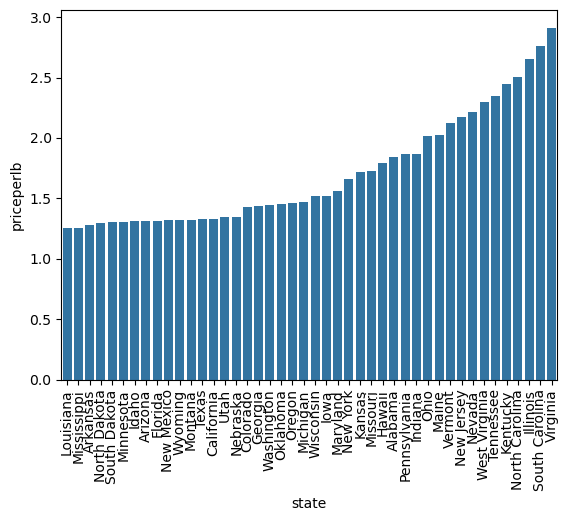

In [29]:
order = df.groupby('state')['priceperlb'].mean().sort_values().index
sns.barplot(data=df,x='state',y='priceperlb',order=order,errorbar=None)
plt.xticks(rotation=90)
plt.show()

## Having more number of colonies will increase the total production. Is this true? 

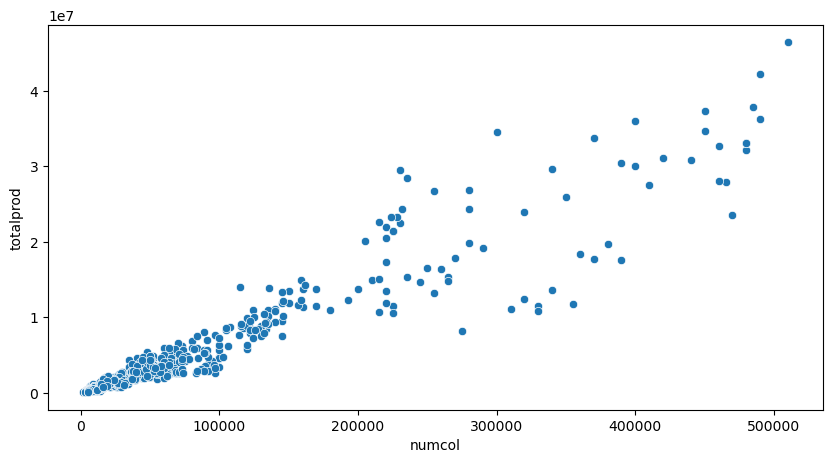

In [94]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=df,x='numcol',y='totalprod')
plt.show()

## Check for correlation among the variables?

## How is the trend of honey production in the US over the years?

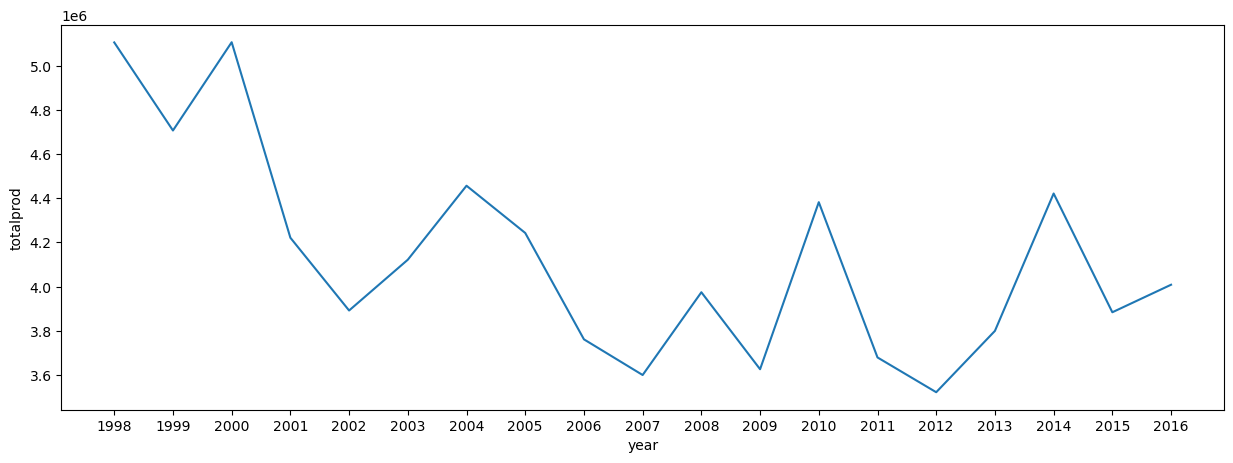

In [108]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df,x='year',y='totalprod',errorbar=None)
plt.xticks(np.arange(1998,2017))
plt.show()

## How is the Variation in the number of colonies over the years?

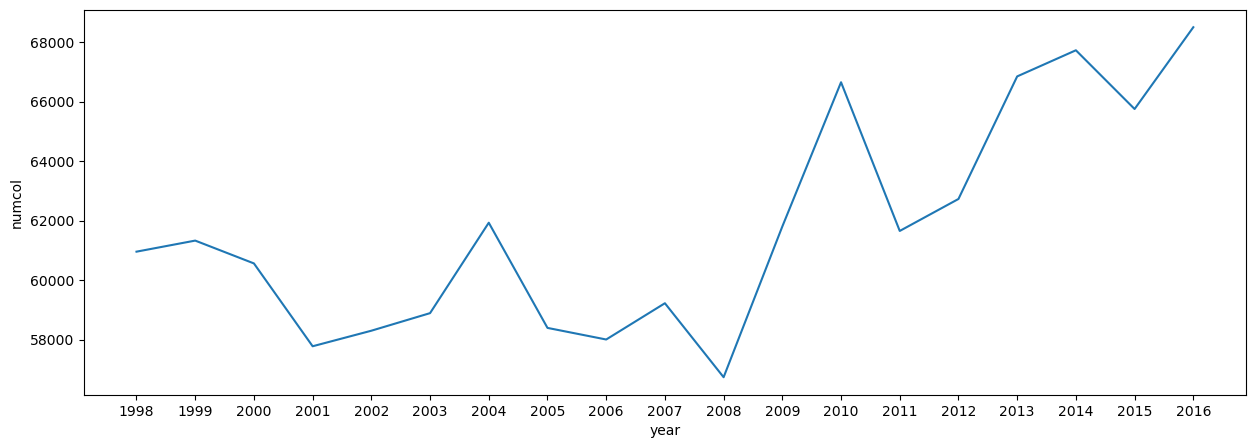

In [116]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df,x='year',y='numcol',errorbar=None)
plt.xticks(np.arange(1998,2017))
plt.show()

## How is the Variation of yield per colony over the years ?

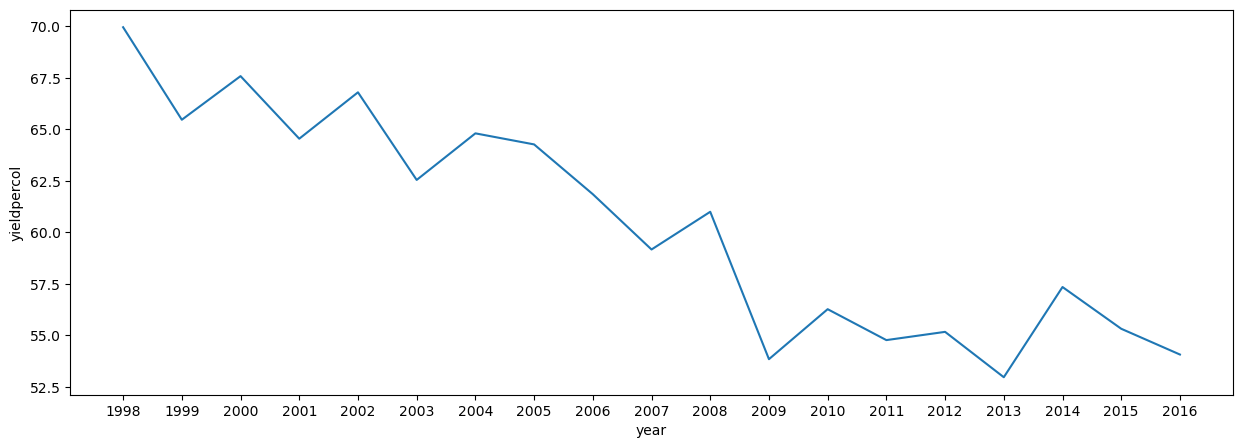

In [118]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df,x='year',y='yieldpercol',errorbar=None)
plt.xticks(np.arange(1998,2017))
plt.show()

## How is the production trend at state level?